# Data Exploration

### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Load data

In [2]:
label_data = pd.read_csv('Train_clinical.txt')
feature_data = pd.read_csv('Train_call.txt')

### Format Loaded File

Columns in file are not correctly seperated in pandas. It puts the different columns in the .txt file seperated by a tab into one column in pandas. To fix this use the code below. 

In [3]:
#new featured column names
f_column = 'Chromosome\t"Start"\t"End"\t"Nclone"\t"Array.129"\t"Array.34"\t"Array.67"\t"Array.24"\t"Array.22"\t"Array.36"\t"Array.49"\t"Array.16"\t"Array.146"\t"Array.143"\t"Array.65"\t"Array.62"\t"Array.4"\t"Array.76"\t"Array.118"\t"Array.154"\t"Array.48"\t"Array.6"\t"Array.39"\t"Array.86"\t"Array.112"\t"Array.79"\t"Array.124"\t"Array.19"\t"Array.27"\t"Array.106"\t"Array.110"\t"Array.69"\t"Array.73"\t"Array.95"\t"Array.98"\t"Array.17"\t"Array.33"\t"Array.138"\t"Array.149"\t"Array.101"\t"Array.90"\t"Array.99"\t"Array.57"\t"Array.105"\t"Array.85"\t"Array.114"\t"Array.56"\t"Array.5"\t"Array.8"\t"Array.113"\t"Array.148"\t"Array.42"\t"Array.25"\t"Array.102"\t"Array.55"\t"Array.141"\t"Array.43"\t"Array.159"\t"Array.52"\t"Array.88"\t"Array.125"\t"Array.152"\t"Array.50"\t"Array.23"\t"Array.68"\t"Array.94"\t"Array.153"\t"Array.51"\t"Array.142"\t"Array.144"\t"Array.37"\t"Array.78"\t"Array.18"\t"Array.82"\t"Array.75"\t"Array.139"\t"Array.2"\t"Array.117"\t"Array.60"\t"Array.38"\t"Array.72"\t"Array.104"\t"Array.137"\t"Array.145"\t"Array.31"\t"Array.135"\t"Array.111"\t"Array.7"\t"Array.21"\t"Array.53"\t"Array.59"\t"Array.71"\t"Array.47"\t"Array.107"\t"Array.64"\t"Array.89"\t"Array.30"\t"Array.35"\t"Array.93"\t"Array.10"\t"Array.123"\t"Array.100"\t"Array.134"\t"Array.130"'

# make list of names for columns when renaming 100 sample columns
f_new_column = f_column.replace('"', '')
f_new_column = f_new_column.split('\t')


# rename the one column feature and label data otherwise splitting command will not work due to quotationmarks 
label_data=label_data.rename(columns ={'Sample\t"Subgroup"':'samples'})
feature_data=feature_data.rename(columns ={f_column:'samples'})

#split feature data into columns
feature_data = pd.DataFrame(feature_data.samples.str.split('\t').tolist(),
                                   columns = f_new_column)

#split label data into columns
label_data = pd.DataFrame(label_data.samples.str.split('\t',1).tolist(),
                                   columns = ['Samples','Subgroups'])

In [4]:
print(label_data)
print(feature_data)

      Samples     Subgroups
0   Array.129       "HER2+"
1    Array.34         "HR+"
2    Array.67         "HR+"
3    Array.24  "Triple Neg"
4    Array.22  "Triple Neg"
5    Array.36         "HR+"
6    Array.49       "HER2+"
7    Array.16       "HER2+"
8   Array.146  "Triple Neg"
9   Array.143       "HER2+"
10   Array.65         "HR+"
11   Array.62  "Triple Neg"
12    Array.4       "HER2+"
13   Array.76       "HER2+"
14  Array.118  "Triple Neg"
15  Array.154  "Triple Neg"
16   Array.48         "HR+"
17    Array.6       "HER2+"
18   Array.39         "HR+"
19   Array.86         "HR+"
20  Array.112  "Triple Neg"
21   Array.79       "HER2+"
22  Array.124         "HR+"
23   Array.19       "HER2+"
24   Array.27         "HR+"
25  Array.106       "HER2+"
26  Array.110       "HER2+"
27   Array.69  "Triple Neg"
28   Array.73       "HER2+"
29   Array.95         "HR+"
..        ...           ...
70   Array.75       "HER2+"
71  Array.139       "HER2+"
72    Array.2         "HR+"
73  Array.117       

### Take out columns not useful for training

The dataset with labels now contains a column with array numbers, which is not useful for classification. We are only interested in the cancer classes: 'HER2+', 'HR+' and 'Triple Neg'. We can however use these array numbers as row names.
The loaded data set with the features contain 4 extra columns added to the 100 samples, namely: Chromosome, Start,End and Nclone. This might be interesting to look at later but is not interesting when training the data because these are not part of the 100 samples.

In [5]:
# for labels take out array
y_train = label_data.drop(['Samples'],axis = 1)
# Use array as row label
sample_nr = 0
for i in label_data.Samples:
    y_train = y_train.rename(index = {sample_nr : i})
    sample_nr +=1

#for feature take out Chromosome, Start,End and Nclone
x_train = feature_data.drop(['Chromosome', 'Start' , 'End', 'Nclone'], axis=1)

#Put features in columns and samples in rows
x_train = pd.DataFrame(x_train.transpose())
x_train = x_train

### Look at shape to make sure columns and rows came out correct

In [6]:
print(y_train)
print(x_train)

              Subgroups
Array.129       "HER2+"
Array.34          "HR+"
Array.67          "HR+"
Array.24   "Triple Neg"
Array.22   "Triple Neg"
Array.36          "HR+"
Array.49        "HER2+"
Array.16        "HER2+"
Array.146  "Triple Neg"
Array.143       "HER2+"
Array.65          "HR+"
Array.62   "Triple Neg"
Array.4         "HER2+"
Array.76        "HER2+"
Array.118  "Triple Neg"
Array.154  "Triple Neg"
Array.48          "HR+"
Array.6         "HER2+"
Array.39          "HR+"
Array.86          "HR+"
Array.112  "Triple Neg"
Array.79        "HER2+"
Array.124         "HR+"
Array.19        "HER2+"
Array.27          "HR+"
Array.106       "HER2+"
Array.110       "HER2+"
Array.69   "Triple Neg"
Array.73        "HER2+"
Array.95          "HR+"
...                 ...
Array.75        "HER2+"
Array.139       "HER2+"
Array.2           "HR+"
Array.117         "HR+"
Array.60          "HR+"
Array.38   "Triple Neg"
Array.72        "HER2+"
Array.104  "Triple Neg"
Array.137         "HR+"
Array.145  "Trip

In [7]:
print(y_train.shape)
print(x_train.shape)


(100, 1)
(100, 2834)


# Feature Selection

In [8]:
#import libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

Apperently there are different models which can be used for feature selection

SelectKBest = uses statistics to measure best k features

SelectForModel = selects best feature for that a specific model(e.g. KNN, SVM). I would not think this is a good option since if we want to compare models we should use the same features. Feature selection for a specific model would probably lead to different features being better for that specific model. Thus we will be comparing different models which classify on different features.

### Univarite Feature selection

 This methode does feature selection using univariate statistics. See http://scikit-learn.org/stable/modules/feature_selection.html for more info.
In this case I used f_classif, which makes the selector use ANOVA as stastics method. 
K is the number of features you want to select.
The selector will now use ANOVA to select the best K features of the model.

We probably should look in to how many features we would want to select...?or Try another method

In [9]:
x_train.shape

(100, 2834)

In [10]:
# feature selection
selector= SelectKBest(f_classif, k=100).fit(x_train,y_train.values.ravel())
x_new = selector.transform(x_train)


In [11]:
x_new.shape

(100, 100)

# Classification models

Possible classification models for multiple classes:

-Neural Networks (Deep Learning)

-KNN

-Decision Tree

-SVM

-Naieve Bayes

## KNN (K-Nearest Neighbour)

In [12]:
#import libraries
from sklearn import model_selection, metrics, grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Hyperparameter selection

Using the GridsearchCV function you can do cross validation to select the 'best' hyperparameters for you model

In [13]:
knn = KNeighborsClassifier()
# define the parameter range that should be searched
k_range = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid_search= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [14]:
grid_search.fit(x_new, y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid_search.grid_scores_]
print(grid_mean_scores)

[0.72999999999999998, 0.72999999999999998, 0.77000000000000002, 0.79000000000000004, 0.79000000000000004, 0.78000000000000003, 0.77000000000000002, 0.76000000000000001, 0.76000000000000001, 0.73999999999999999, 0.76000000000000001, 0.75, 0.75, 0.78000000000000003, 0.80000000000000004, 0.78000000000000003, 0.79000000000000004, 0.78000000000000003, 0.75, 0.76000000000000001, 0.76000000000000001, 0.75, 0.72999999999999998, 0.72999999999999998, 0.70999999999999996, 0.68000000000000005, 0.67000000000000004, 0.69999999999999996, 0.66000000000000003, 0.66000000000000003]


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

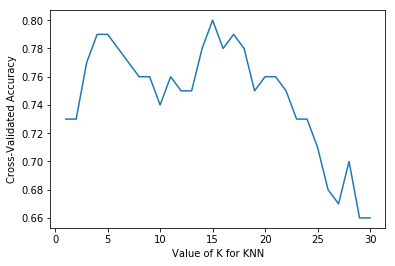

In [16]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
print('Best score:', grid_search.best_score_)
print('Best k for knn:',grid_search.best_params_)

Best score: 0.8
Best k for knn: {'n_neighbors': 15}


### KNN model with optimized hyperparameters

In [18]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(x_new,y_train.values.ravel())

y_predict = knn_model.predict(x_new)

I know you should predict on y_test but since we have do not have that yet I will just use y_train for now

In [19]:
print('accuracy: ',metrics.accuracy_score(y_train, y_predict))

accuracy:  0.82
